In [9]:
import numpy as np
import os
from py_helpers import *
import matplotlib.pyplot as plt

data_path = "/media/hsa22/Expansion/Brain-MINDS/processed_dMRI/MRTRIX/connectomes_MBCA_tracer"

In [10]:
csv_files = glob_files(data_path, "csv")
# csv_files = [csv_file for csv_file in csv_files if "connectomes_MBCA" in csv_file and "flipped" in csv_file]
print("Found {} csv files".format(len(csv_files)))

Found 52 csv files


In [11]:
loaded_csv = []

for i in range(len(csv_files)):
    loaded_csv.append(np.genfromtxt(csv_files[i], delimiter=','))

print(loaded_csv[0].shape)

(139, 139)


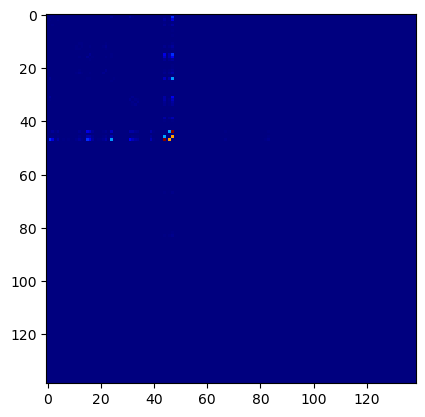

In [13]:
plt.figure()
plt.imshow(loaded_csv[1], interpolation='nearest', aspect='equal', cmap='jet')

In [ ]:
tck_path = "/media/hsa22/Expansion/Brain-MINDS/combined_streamlines/combined_track.tck"
atlas_reg_path = "/media/hsa22/Expansion/Brain-MINDS/BMCR_STPT_template/Atlases/registered_atlas_integer.nii.gz"
connectome_path = "/media/hsa22/Expansion/Brain-MINDS/combined_streamlines/combined_track.csv"

CONNECTIVITY_PROB_CMD = "tck2connectome {input} {atlas} {output} -zero_diagonal -symmetric \
-assignment_all_voxels -force".format(input=tck_path, atlas=atlas_reg_path, output=connectome_path)

# Run the command
print("Running: {}".format(CONNECTIVITY_PROB_CMD))
subprocess.run(CONNECTIVITY_PROB_CMD, shell=True, check=True)

connectome_path = "/media/hsa22/Expansion/Brain-MINDS/combined_streamlines/combined_track.csv"
connectome2_path = "/media/hsa22/Expansion/Brain-MINDS/combined_streamlines/combined_tracer_streamlines.csv"
connectome = np.genfromtxt(connectome_path, delimiter=",")

plt.figure()
plt.imshow(connectome)